In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


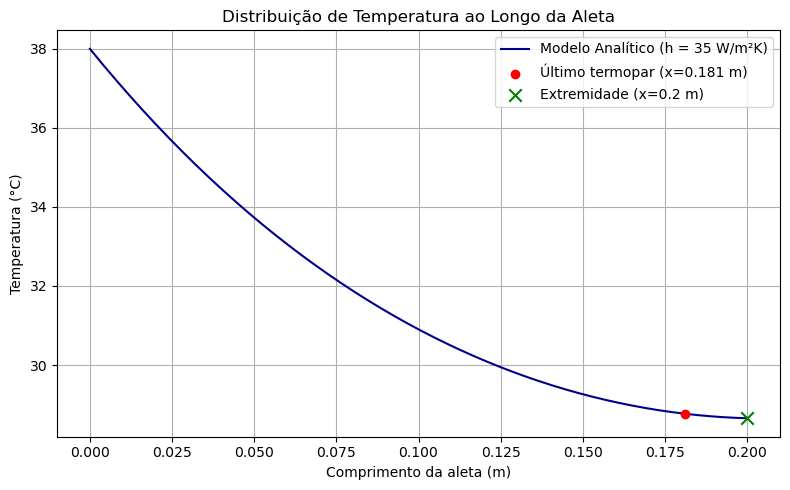

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# Exemplo de ajuste conforme a Figura 3 (Projeto 1)
#------------------------------------------------------------------------------
# ATENÇÃO: Ajuste as variáveis de entrada (T_base, T_amb, etc.)
# de acordo com as medições reais do seu experimento ou planilha.
#------------------------------------------------------------------------------

# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

# Temperaturas (conforme seu experimento)
T_amb  = 18.0        # Ajuste conforme medição real
T_base = 38.0        # Ajuste conforme medição real

# 2) Propriedades do material
k = 160  # [W/m.K] (Alumínio 2014 aproximado)
h = 35   # [W/m².K] estimativa de convecção forçada

# 3) Dimensões da aleta conforme desenho:
#    - Comprimento total ~ 200 mm
#    - Diâmetro nominal ~ 24 mm
L = 0.20      # metros (200 mm)
D = 0.024     # metros (24 mm)
Ac = np.pi*(D/2)**2  # área de seção transversal [m²]
P  = np.pi*D         # perímetro lateral [m]

# 4) Posição do último termopar
#    Conforme o desenho, o último furo está a 181 mm da base esquerda
x_ultimo_termopar = 0.181  # em metros

# 5) Cálculo do parâmetro m
m = np.sqrt( (h * P) / (k * Ac) )

# 6) Solução analítica da distribuição de temperatura
#    (regime estacionário, com T(0)=T_base e convecção na ponta x=L)
x = np.linspace(0, L, 200)

# Excesso de temperatura (theta) = (T - T_amb)
numerador   = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
denominador = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta       = numerador / denominador

# Temperatura absoluta
T_analitico = T_amb + (T_base - T_amb)*theta

# 7) Temperatura no último termopar e na extremidade (ponta) da aleta
T_no_ultimo_termopar  = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade         = T_analitico[-1]  # valor em x=L

# 8) Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico (h = {h} W/m²K)", color="darkblue")

# Marcar posição do último termopar
plt.scatter(x_ultimo_termopar, T_no_ultimo_termopar,
            color='red', zorder=5,
            label=f"Último termopar (x={x_ultimo_termopar:.3f} m)")

# Marcar extremidade
plt.scatter(L, T_extremidade,
            color='green', marker='x', s=80, zorder=5,
            label=f"Extremidade (x={L} m)")

plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura ao Longo da Aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------
# Observações:
# - O valor de L=0.20 m reflete a dimensão de 200 mm total no desenho.
# - O diâmetro D=0.024 m (24 mm) foi estimado pelo projeto (Figura 3).
# - A posição do último termopar (x=0.181 m) corresponde aos 181 mm indicados.
# - Ajuste T_base, T_amb, h etc. conforme o seu experimento real.
#------------------------------------------------------------------------------
